In [42]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# read in data from h5py
file = h5py.File('results.hdf5', 'r')
names = [x[0] for x in file.items()]
values = [list(x[1]) for x in file.items()]
print(len(names))
file.close()

1050


In [52]:
new_names = []
for n in names:
    nn = n.split()
    new_names.append((int(nn[1]), (float(nn[3]),float(nn[5])), float(nn[7]), float(nn[9])))

In [53]:
# key structure: (hwindow, (reward, wait_penalty), epsilon, discount_factor)
# value structure: (accuracy_score, purchase_fraction)
data = dict(zip(new_names, values))

In [54]:
hwindows = sorted(list(set([x[0] for x in data.keys()])))
rewards = sorted(list(set([x[1][0] for x in data.keys()])))
wait_penalties = sorted(list(set([x[1][1] for x in data.keys()])))
epsilons = sorted(list(set([x[2] for x in data.keys()])))
discount_factors = list(set([x[3] for x in data.keys()]))

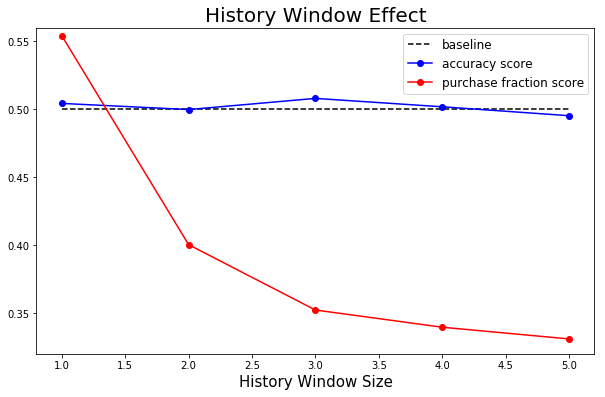

In [68]:
# Visualizations: History Window
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hwindows, [.5]*len(hwindows), 'k--',label='baseline')
ax.plot(hwindows, [data[(h, (1,-.1), .01, 1)][0] for h in hwindows], 'bo-', label='accuracy score')
ax.plot(hwindows, [data[(h, (1,-.1), .01, 1)][1] for h in hwindows], 'ro-', label='purchase fraction score') 
ax.set_xlabel('History Window Size', fontsize=15)
ax.set_title('History Window Effect', fontsize=20)
ax.set_ylim([.32, .56])
ax.legend(fontsize=12)
plt.savefig('hist_effect.png')

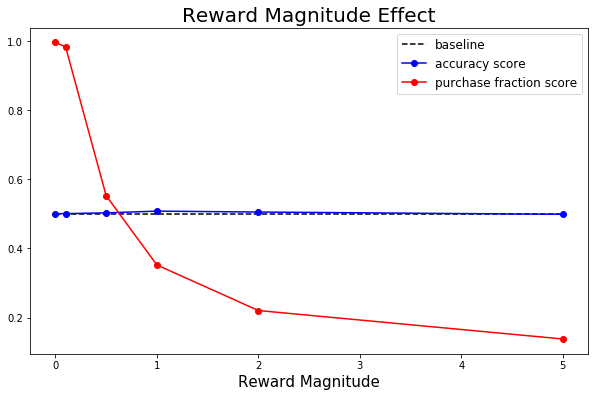

In [56]:
# Visualizations: Reward
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(rewards, [.5]*len(rewards), 'k--',label='baseline')
ax.plot(rewards, [data[(3, (r,-.1), .01, 1)][0] for r in rewards], 'bo-', label='accuracy score')
ax.plot(rewards, [data[(3, (r,-.1), .01, 1)][1] for r in rewards], 'ro-', label='purchase fraction score') 
ax.set_xlabel('Reward Magnitude', fontsize=15)
ax.set_title('Reward Magnitude Effect', fontsize=20)
ax.legend(fontsize=12)

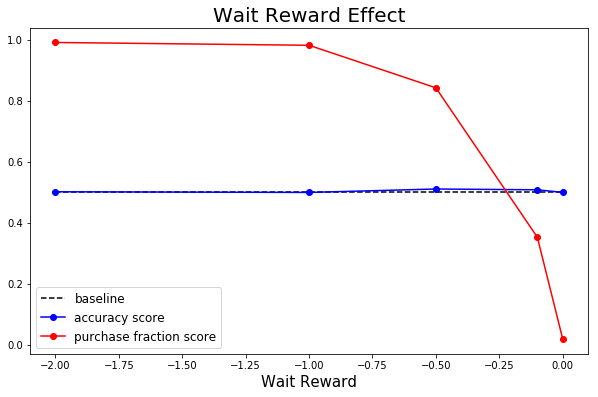

In [57]:
# Visualizations: Wait Penalty
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(wait_penalties, [.5]*len(wait_penalties), 'k--',label='baseline')
ax.plot(wait_penalties, [data[(3, (1,w), .01, 1)][0] for w in wait_penalties], 'bo-', label='accuracy score')
ax.plot(wait_penalties, [data[(3, (1,w), .01, 1)][1] for w in wait_penalties], 'ro-', label='purchase fraction score') 
ax.set_xlabel('Wait Reward', fontsize=15)
ax.set_title('Wait Reward Effect', fontsize=20)
ax.legend(fontsize=12)

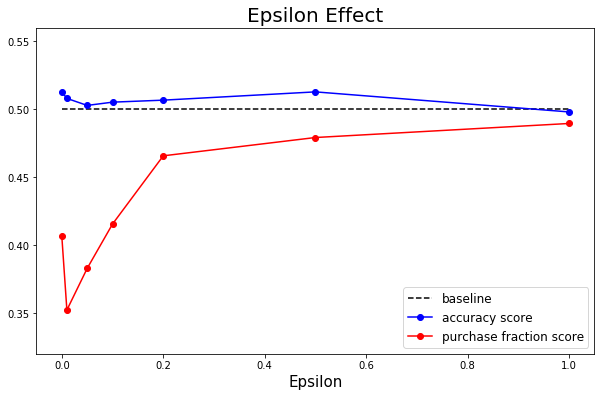

In [69]:
# Visualizations: Epsilon
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(epsilons, [.5]*len(epsilons), 'k--',label='baseline')
ax.plot(epsilons, [data[(3, (1,-.1), e, 1)][0] for e in epsilons], 'bo-', label='accuracy score')
ax.plot(epsilons, [data[(3, (1,-.1), e, 1)][1] for e in epsilons], 'ro-', label='purchase fraction score') 
ax.set_xlabel('Epsilon', fontsize=15)
ax.set_title('Epsilon Effect', fontsize=20)
ax.set_ylim([.32, .56])
ax.legend(fontsize=12, loc='lower right')
plt.savefig('epsilon_effect.png')